In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("flight ticket.csv",parse_dates=["Date_of_Journey"])

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [5]:
df.isnull().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
df.nunique()

Airline              12
Date_of_Journey      40
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [7]:

df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [8]:
df.shape

(10683, 11)

In [9]:
df.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

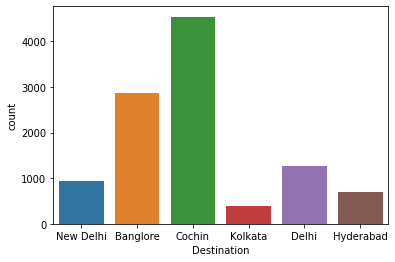

In [10]:
sns.countplot(df.Destination)
#cochin is the most frequent destination

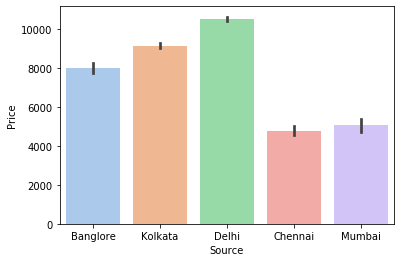

In [11]:
x=df['Source']
y=df['Price']
sns.barplot(x,y,data = df, palette ='pastel')
#delhi being as a source has the highest price

In [12]:
pd.crosstab(df['Airline'],df['Additional_Info'])
#we can see which airline has given which more facility

Additional_Info,1 Long layover,1 Short layover,2 Long layover,Business class,Change airports,In-flight meal not included,No Info,No check-in baggage included,No info,Red-eye flight
Airline,,,,,,,,,,
Air Asia,0,0,0,0,0,0,0,0,318,1
Air India,6,1,1,0,7,0,0,0,1737,0
GoAir,0,0,0,0,0,0,0,0,194,0
IndiGo,0,0,0,0,0,0,3,0,2050,0
Jet Airways,12,0,0,1,0,1886,0,0,1950,0
Jet Airways Business,0,0,0,3,0,0,0,0,3,0
Multiple carriers,0,0,0,0,0,96,0,0,1100,0
Multiple carriers Premium economy,0,0,0,0,0,0,0,0,13,0
SpiceJet,1,0,0,0,0,0,0,320,497,0


In [13]:
df_dates=pd.DataFrame()
df_dates["day"]=df["Date_of_Journey"].dt.day_name()
df_dates["year"]=df["Date_of_Journey"].dt.year
df_dates["month"]=df["Date_of_Journey"].dt.month_name()
df_dates["Price"]=df["Price"]

In [14]:
df_dates["type_of_day"]=np.where((df_dates["day"]=="Sunday")|(df_dates["day"]=="Saturday"),"weekend","weekday")


In [15]:
df_dates
#comparitively on a weekday price is greater than the weekend lets understand better with more graphs 

,day,year,month,Price,type_of_day
0,Sunday,2019,March,3897,weekend
1,Saturday,2019,January,7662,weekend
2,Friday,2019,September,13882,weekday
3,Thursday,2019,December,6218,weekday
4,Thursday,2019,January,13302,weekday
...,...,...,...,...,...
10678,Wednesday,2019,September,4107,weekday
10679,Saturday,2019,April,4145,weekend
10680,Saturday,2019,April,7229,weekend
10681,Thursday,2019,January,12648,weekday


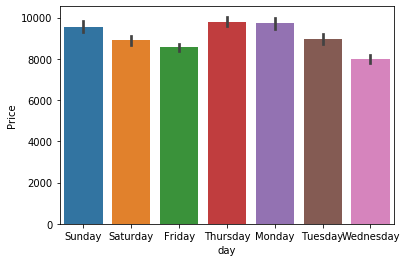

In [16]:
sns.barplot(x="day",y="Price",data=df_dates)
plt.show()
#so on weekdays thursday and monday have the highest price and on weekend sunday has a greater price compared to saturday

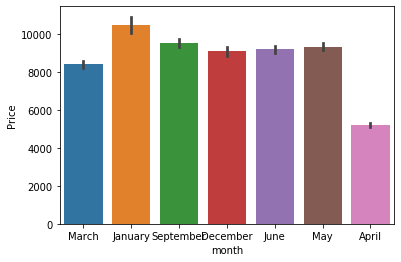

In [17]:
sns.barplot(x="month",y="Price",data=df_dates)
plt.show()
#january has the highest price


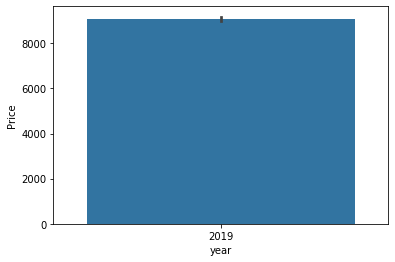

In [18]:
sns.barplot(x="year",y="Price",data=df_dates)
plt.show()
#we have all the data of 2019 year

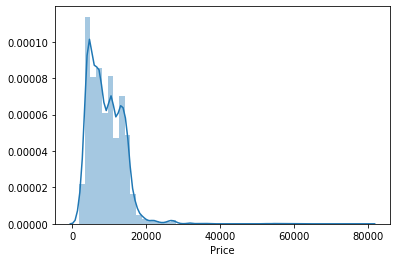

In [19]:
sns.distplot(df.Price)
#price lies mostly till 20,000

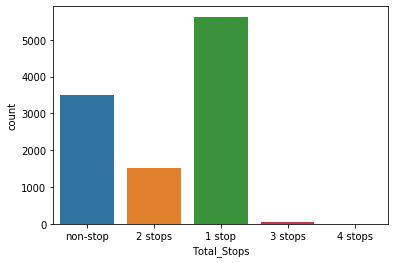

In [20]:
x=df['Total_Stops']
ax=sns.countplot(x=x,data=df)
#mostly flights have 1 stop

In [21]:
#lets prepare new df for training nd testing
df1=pd.read_csv("flight ticket.csv")
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [22]:
#filling missing value
cols = ["Route","Total_Stops"]

df1[cols]=df[cols].fillna(df1.mode().iloc[0])

In [23]:
#lets work with the route column we can see max 5 places can be travelled lets split it
df1['Route_1']=df1['Route'].str.split('?').str[0]
df1['Route_2']=df1['Route'].str.split('?').str[1]
df1['Route_3']=df1['Route'].str.split('?').str[2]
df1['Route_4']=df1['Route'].str.split('?').str[3]
df1['Route_5']=df1['Route'].str.split('?').str[4]

In [24]:
df1['Route_1'].fillna("None",inplace=True)
df1['Route_2'].fillna("None",inplace=True)
df1['Route_3'].fillna("None",inplace=True)
df1['Route_4'].fillna("None",inplace=True)
df1['Route_5'].fillna("None",inplace=True)

In [25]:
df1['Date']=df1['Date_of_Journey'].str.split('/').str[0]
df1['Month']=df1['Date_of_Journey'].str.split('/').str[1]
df1['Year']=df1['Date_of_Journey'].str.split('/').str[2]
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Route_1,Route_2,Route_3,Route_4,Route_5,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,BLR,DEL,None,None,None,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,CCU,IXR,BBI,BLR,None,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,DEL,LKO,BOM,COK,None,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,CCU,NAG,BLR,None,None,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,BLR,NAG,DEL,None,None,01,03,2019


In [26]:
df1['Date']=df1['Date'].astype(int)
df1['Month']=df1['Month'].astype(int)
df1['Year']=df1['Year'].astype(int)

In [27]:
df1['Arrival_Time']=df['Arrival_Time'].str.split(' ').str[0]

In [28]:
#we already have dates lets seperate time into hours and minutes of the arrival time column
df1['Arrival_Hour']=df1['Arrival_Time'].str.split(':').str[0]
df1['Arrival_Minute']=df1['Arrival_Time'].str.split(':').str[1]

df1['Arrival_Hour']=df1['Arrival_Hour'].astype(int)
df1['Arrival_Minute']=df1['Arrival_Minute'].astype(int)

In [29]:
#lets work with stop column  it has string type data too like 'non stop' so coverting to zero stop
df1['Total_Stops']=df1['Total_Stops'].replace('non-stop','0 stop')
df1['Stop']=df1['Total_Stops'].str.split(' ').str[0]
df1['Stop']=df1['Stop'].astype(int)



In [30]:
#departure time
df1['Dep_Hour']=df1['Dep_Time'].str.split(':').str[0]
df1['Dep_Minute']=df1['Dep_Time'].str.split(':').str[1]

df1['Dep_Hour']=df1['Dep_Hour'].astype(int)
df1['Dep_Minute']=df1['Dep_Minute'].astype(int)

In [31]:
df1.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
Route_1            object
Route_2            object
Route_3            object
Route_4            object
Route_5            object
Date                int32
Month               int32
Year                int32
Arrival_Hour        int32
Arrival_Minute      int32
Stop                int32
Dep_Hour            int32
Dep_Minute          int32
dtype: object

In [32]:
df1.drop(['Route','Total_Stops','Dep_Time','Arrival_Time','Duration','Date_of_Journey'],axis = 1,inplace=True)

In [33]:
#route we have already transformed lets label encode these categorical variables
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df1["Additional_Info"]=lb.fit_transform(df1["Additional_Info"])
df1["Route_1"]=lb.fit_transform(df1["Route_1"])
df1["Route_2"]=lb.fit_transform(df1["Route_2"])
df1["Route_3"]=lb.fit_transform(df1["Route_3"])
df1["Route_4"]=lb.fit_transform(df1["Route_4"])
df1["Route_5"]=lb.fit_transform(df1["Route_5"])
df1["Airline"]=lb.fit_transform(df1["Airline"])
df1["Destination"]=lb.fit_transform(df1["Destination"])
df1["Source"]=lb.fit_transform(df1["Source"])


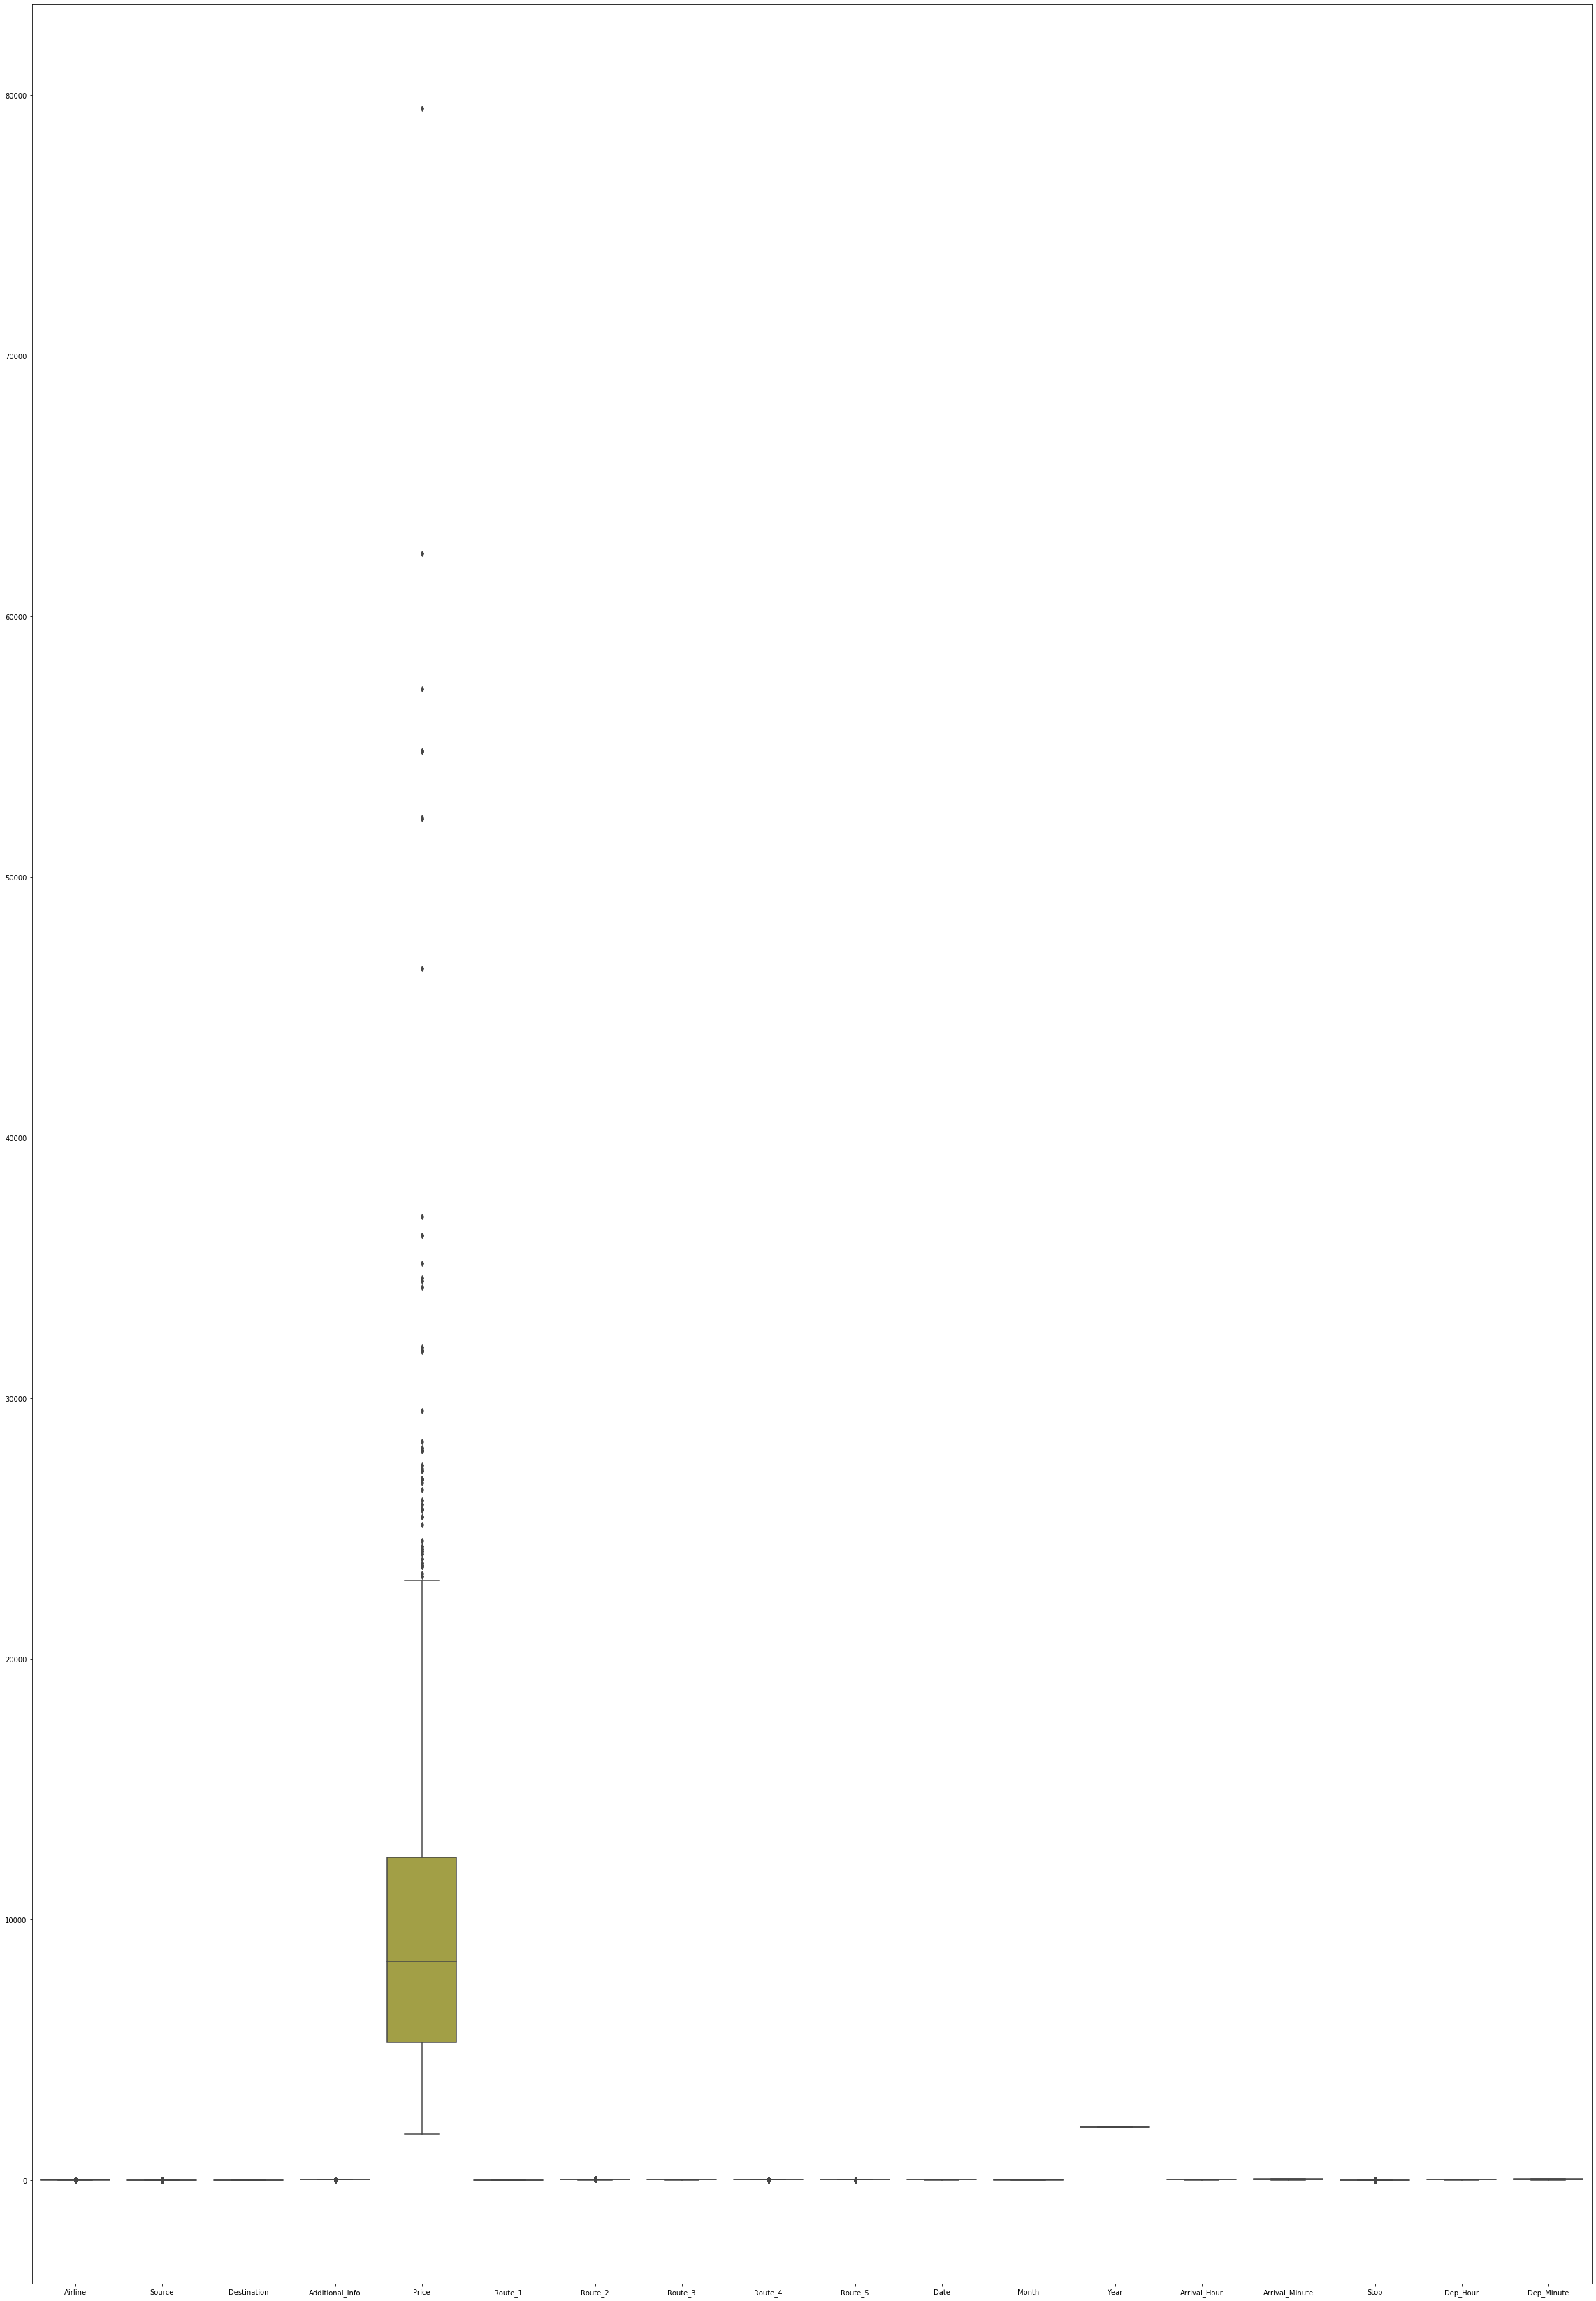

In [34]:
plt.figure(figsize = (40,60))
sns.boxplot(data=df1)

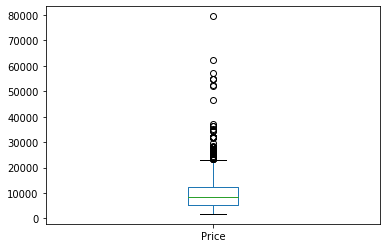

In [35]:
#price has outliers present

df1['Price'].plot.box()

In [36]:
df.loc[df['Price']>25000,'']=np.mean(df['Price'])

In [37]:
df1.corr()

,Airline,Source,Destination,Additional_Info,Price,Route_1,Route_2,Route_3,Route_4,Route_5,Date,Month,Year,Arrival_Hour,Arrival_Minute,Stop,Dep_Hour,Dep_Minute
Airline,1.000000,-0.013401,0.018479,-0.060802,-0.039520,0.035209,-0.061335,0.060414,0.261808,0.056832,0.026238,0.024643,NaN,-0.007491,-0.071089,-0.199411,-0.035194,-0.060044
Source,-0.013401,1.000000,-0.592574,-0.022107,0.015998,0.437882,0.035844,-0.271200,-0.076015,-0.008329,0.004898,0.183268,NaN,0.025632,0.021040,0.192840,0.059044,-0.056991
Destination,0.018479,-0.592574,1.000000,0.026806,-0.071112,-0.483347,0.077902,0.410152,0.132148,0.009125,-0.040998,-0.364686,NaN,-0.039710,0.017196,-0.295481,-0.072979,0.127892
Additional_Info,-0.060802,-0.022107,0.026806,1.000000,-0.065478,0.015356,0.077853,0.167129,-0.042353,-0.030927,-0.016337,-0.051478,NaN,0.026173,0.041311,-0.082426,-0.051010,-0.019339
Price,-0.039520,0.015998,-0.071112,-0.065478,1.000000,0.182135,-0.087218,-0.591270,-0.316937,-0.055643,-0.153738,-0.103651,NaN,0.024264,-0.086155,0.603883,0.006819,-0.024492
Route_1,0.035209,0.437882,-0.483347,0.015356,0.182135,1.000000,-0.083703,-0.474853,-0.200075,-0.014256,0.079652,0.230668,NaN,0.015846,-0.172988,0.428924,-0.044459,-0.073887
Route_2,-0.061335,0.035844,0.077902,0.077853,-0.087218,-0.083703,1.000000,-0.003262,-0.263797,-0.088020,-0.024689,0.048393,NaN,-0.012187,0.045965,0.162241,-0.126174,0.091510
Route_3,0.060414,-0.271200,0.410152,0.167129,-0.591270,-0.474853,-0.003262,1.000000,0.240404,-0.017642,0.022837,-0.083183,NaN,-0.081752,0.159989,-0.800259,0.015021,0.048961
Route_4,0.261808,-0.076015,0.132148,-0.042353,-0.316937,-0.200075,-0.263797,0.240404,1.000000,0.129523,-0.018712,-0.071507,NaN,0.048553,-0.022570,-0.729373,0.047480,-0.042955
Route_5,0.056832,-0.008329,0.009125,-0.030927,-0.055643,-0.014256,-0.088020,-0.017642,0.129523,1.000000,0.006611,0.001297,NaN,-0.026990,0.019213,-0.207430,0.047010,0.005452


In [38]:
df1.shape

(10683, 18)

In [39]:
df1.isnull().sum()

Airline            0
Source             0
Destination        0
Additional_Info    0
Price              0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
Date               0
Month              0
Year               0
Arrival_Hour       0
Arrival_Minute     0
Stop               0
Dep_Hour           0
Dep_Minute         0
dtype: int64

In [40]:
df1.corr()

,Airline,Source,Destination,Additional_Info,Price,Route_1,Route_2,Route_3,Route_4,Route_5,Date,Month,Year,Arrival_Hour,Arrival_Minute,Stop,Dep_Hour,Dep_Minute
Airline,1.000000,-0.013401,0.018479,-0.060802,-0.039520,0.035209,-0.061335,0.060414,0.261808,0.056832,0.026238,0.024643,NaN,-0.007491,-0.071089,-0.199411,-0.035194,-0.060044
Source,-0.013401,1.000000,-0.592574,-0.022107,0.015998,0.437882,0.035844,-0.271200,-0.076015,-0.008329,0.004898,0.183268,NaN,0.025632,0.021040,0.192840,0.059044,-0.056991
Destination,0.018479,-0.592574,1.000000,0.026806,-0.071112,-0.483347,0.077902,0.410152,0.132148,0.009125,-0.040998,-0.364686,NaN,-0.039710,0.017196,-0.295481,-0.072979,0.127892
Additional_Info,-0.060802,-0.022107,0.026806,1.000000,-0.065478,0.015356,0.077853,0.167129,-0.042353,-0.030927,-0.016337,-0.051478,NaN,0.026173,0.041311,-0.082426,-0.051010,-0.019339
Price,-0.039520,0.015998,-0.071112,-0.065478,1.000000,0.182135,-0.087218,-0.591270,-0.316937,-0.055643,-0.153738,-0.103651,NaN,0.024264,-0.086155,0.603883,0.006819,-0.024492
Route_1,0.035209,0.437882,-0.483347,0.015356,0.182135,1.000000,-0.083703,-0.474853,-0.200075,-0.014256,0.079652,0.230668,NaN,0.015846,-0.172988,0.428924,-0.044459,-0.073887
Route_2,-0.061335,0.035844,0.077902,0.077853,-0.087218,-0.083703,1.000000,-0.003262,-0.263797,-0.088020,-0.024689,0.048393,NaN,-0.012187,0.045965,0.162241,-0.126174,0.091510
Route_3,0.060414,-0.271200,0.410152,0.167129,-0.591270,-0.474853,-0.003262,1.000000,0.240404,-0.017642,0.022837,-0.083183,NaN,-0.081752,0.159989,-0.800259,0.015021,0.048961
Route_4,0.261808,-0.076015,0.132148,-0.042353,-0.316937,-0.200075,-0.263797,0.240404,1.000000,0.129523,-0.018712,-0.071507,NaN,0.048553,-0.022570,-0.729373,0.047480,-0.042955
Route_5,0.056832,-0.008329,0.009125,-0.030927,-0.055643,-0.014256,-0.088020,-0.017642,0.129523,1.000000,0.006611,0.001297,NaN,-0.026990,0.019213,-0.207430,0.047010,0.005452


In [41]:
x = df1.drop(['Price','Year','Dep_Minute','Dep_Hour','Arrival_Hour','Route_5'], axis = 1)
y= df1['Price']

In [42]:
from sklearn.decomposition import PCA
pca_new = PCA(n_components=12)
x = pca_new.fit_transform(x)

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [44]:
lm=LinearRegression()

In [45]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
lm.score(x_train,y_train)

0.4860443480184655

In [47]:
lm.score(x_test,y_test)

0.508410162270635

In [48]:
from sklearn import linear_model
from sklearn.metrics import r2_score
max_r_score=0
for r_state in range(42,2000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.33)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)    

max r2 score corresponding to  423  is  0.5415173077751748


In [49]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
tree_reg = DecisionTreeRegressor()
scores = cross_val_score(tree_reg,x,y,
                        scoring="neg_mean_squared_error", cv=10)

In [50]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso()
ls.fit(x_train,y_train)
print(ls.score(x_train,y_train))

0.5007390022553604


In [51]:
from sklearn.model_selection import GridSearchCV
alphavalue={'alpha':[1,0.1,0.01,0.001,0.0001,0]}
model=Ridge()
grid=GridSearchCV(estimator=model,param_grid=alphavalue)
grid.fit(x,y)
print(grid)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
1
{'alpha': 1}


In [52]:
rd=Ridge(alpha=1)
rd.fit(x,y)
print(rd.coef_)
print(rd.score(x_test,y_test))

[ -44.86145181 -237.36120236   53.83205121  -68.4914292   273.25218198
  204.00857539  680.91210677 -207.44883274  154.83827673 -139.85080107
  152.61080754 2758.34371716]
0.4804750855516289


In [53]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(x,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [54]:
forest_scores = cross_val_score(forest_reg,x,y,
                               scoring="neg_mean_squared_error", cv=10)

In [55]:
forest_rmse_scores = np.sqrt(-forest_scores)

In [56]:
print("Mean:\t\t ", forest_rmse_scores.mean(), "\nStandard Deviation:", forest_rmse_scores.std())

Mean:		  1806.9660493136987 
Standard Deviation: 272.7737489333116


In [57]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
tree_reg = DecisionTreeRegressor()
scores = cross_val_score(tree_reg,x,y,
                        scoring="neg_mean_squared_error", cv=10)

In [58]:
tree_reg_scores = np.sqrt(-scores)

In [59]:
rmse_scores = np.sqrt(-scores)
print("Mean:\t\t ", rmse_scores.mean(), "\nStandard Deviation:", tree_reg_scores.std())

Mean:		  2103.7796671240912 
Standard Deviation: 312.48645902270516


In [60]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=8, max_leaf_nodes=None, n_estimators=30)
forest_reg.fit(x,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [61]:
r2_score(forest_reg.predict(x_train),y_train)

0.9328167170641255

In [62]:
r2_score(forest_reg.predict(x_test),y_test)

0.9235746377129369

In [63]:
from sklearn.externals import joblib
joblib.dump(forest_reg,'forest_regflight.obj')
forest_reg_from_joblib=joblib.load('forest_regflight.obj')